<a href="https://colab.research.google.com/github/insaiyancvk/speedyblackman/blob/main/speedy%20preprocess%20work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Starting with Left/Right work

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image

Mounted at /content/drive
     |████████████████████████████████| 490 kB 3.5 MB/s 
     |████████████████████████████████| 58 kB 7.6 MB/s 
     |████████████████████████████████| 428 kB 62.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, telegram, json, cv2, time, random, zipfile
import shutil
from PIL import Image
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"{device} activated.")

cuda activated.


In [ ]:
print("Initializing kaggle")
!rm -rf /root/.kaggle && mkdir /root/.kaggle && cp /content/drive/MyDrive/kaggle.json . && mv kaggle.json /root/.kaggle/kaggle.json

print("Downloading the dataset")
!kaggle datasets download insaiyancvk/nfs-rivals-left-and-right-turn-data

print("Extracting the dataset")
with zipfile.ZipFile("nfs-rivals-left-and-right-turn-data.zip") as zf:
  for member in tqdm(zf.infolist(), desc='Extracting'):
    try:
      zf.extract(member, "/content")
    except zipfile.error:
      pass
!rm nfs-rivals-left-and-right-turn-data.zip

Initializing kaggle
100% 6.88G/6.88G [02:19<00:00, 83.1MB/s]
100% 6.88G/6.88G [02:19<00:00, 53.1MB/s]
Extracting the dataset


Extracting:   0%|          | 0/34916 [00:00<?, ?it/s]

In [ ]:
class send(): 

  def __init__(self):
    f = open ('/content/drive/MyDrive/tel.json', 'r')
    self.tel = json.load(f)
    f.close()
    self.bot = telegram.Bot(token=self.tel['token']) 

  def msg(self, mesg):
    self.bot.sendMessage(chat_id=self.tel['nnboiid'], text=mesg)

  def pic(self, path):
    self.bot.sendPhoto(chat_id=self.tel['nnboiid'], photo=open(path, 'rb'))
bot = send()

## Preprocess the data

### Image augmentation for the NN to generalise better

### Train-Test split

In [ ]:
paths = {
    'a': [],
    'd': []
}

In [ ]:
paths['a'] += os.listdir('/content/set2/a')
paths['d'] += os.listdir('/content/set2/d')

In [ ]:
paths['a'] = ['set2/a/'+i for i in paths['a']]
paths['d'] = ['set2/d/'+i for i in paths['d']]

In [ ]:
!cp -r /content/set2/ /content/drive/MyDrive/speedata/set2/

In [ ]:
SPLIT_FOLDERS = {
    'TRAIN': os.path.join("set2","train"),
    'TRAIN_a': os.path.join("set2","train","a"),
    'TRAIN_d': os.path.join("set2","train","d"),
    'TEST': os.path.join("set2","test"),
    'TEST_a': os.path.join("set2","test","a"),
    'TEST_d': os.path.join("set2","test","d")
}

In [ ]:
for key in SPLIT_FOLDERS:
  if not os.path.isdir(SPLIT_FOLDERS[key]):
    os.mkdir(SPLIT_FOLDERS[key])
    print(f"{SPLIT_FOLDERS[key]} created")

### Split the data and save the image names in a json file

In [ ]:
from math import floor
splitted_data_paths = {
    'train_a': paths['a'][:floor(len(paths['a'])*0.8)],
    'train_d': paths['d'][:floor(len(paths['d'])*0.8)],
    'test_a': paths['a'][floor(len(paths['a'])*0.8):],
    'test_d': paths['d'][floor(len(paths['d'])*0.8):]
}

In [ ]:
f = open ('/content/drive/MyDrive/speedata/data.json', 'r')
load_data = json.load(f)
f.close()

### Moving the images to the appropriate directories

In [ ]:
try:
  print("Creating train split for 'a' class")
  for path in load_data['train_a']:
    shutil.move(path, SPLIT_FOLDERS['TRAIN_a'])
except:
  pass
try:  
  print("Creating train split for 'd' class")
  for path in load_data['train_d']:
    shutil.move(path, SPLIT_FOLDERS['TRAIN_d'])
except:
  pass
try:
  print("Creating test split for 'a' class")
  for path in load_data['test_a']:
    shutil.move(path, SPLIT_FOLDERS['TEST_a'])
except:
  pass
try:
  print("Creating test split for 'd' class")
  for path in load_data['test_d']:
    shutil.move(path, SPLIT_FOLDERS['TEST_d'])
except:
  pass
try:
  os.rmdir('set2/a')
except:
  pass
try:
  os.rmdir('set2/d')
except:
  pass

### Defining some constants

In [ ]:
print("Initializing classes")

class_list = [
              'a',
              'd']

print("Creating workspace")

drive = os.path.join("drive","MyDrive")
FOLDERS = {
    "TRAIN": os.path.join("set2","train"),
    "TEST": os.path.join("set2","test"),
    "WORKSPACE": os.path.join(drive,"speedata","workspace"),
    "MODELS": os.path.join(drive,"speedata","workspace","models"),
    "PERFORMANCE": os.path.join(drive,"speedata","workspace","performance")
}

for key in FOLDERS:
  if not os.path.isdir(FOLDERS[key]):
    print(key, "directory doesn't exist. Creating one.")
    os.mkdir(FOLDERS[key])
    print(key, "directory created.")

Initializing classes
Creating workspace


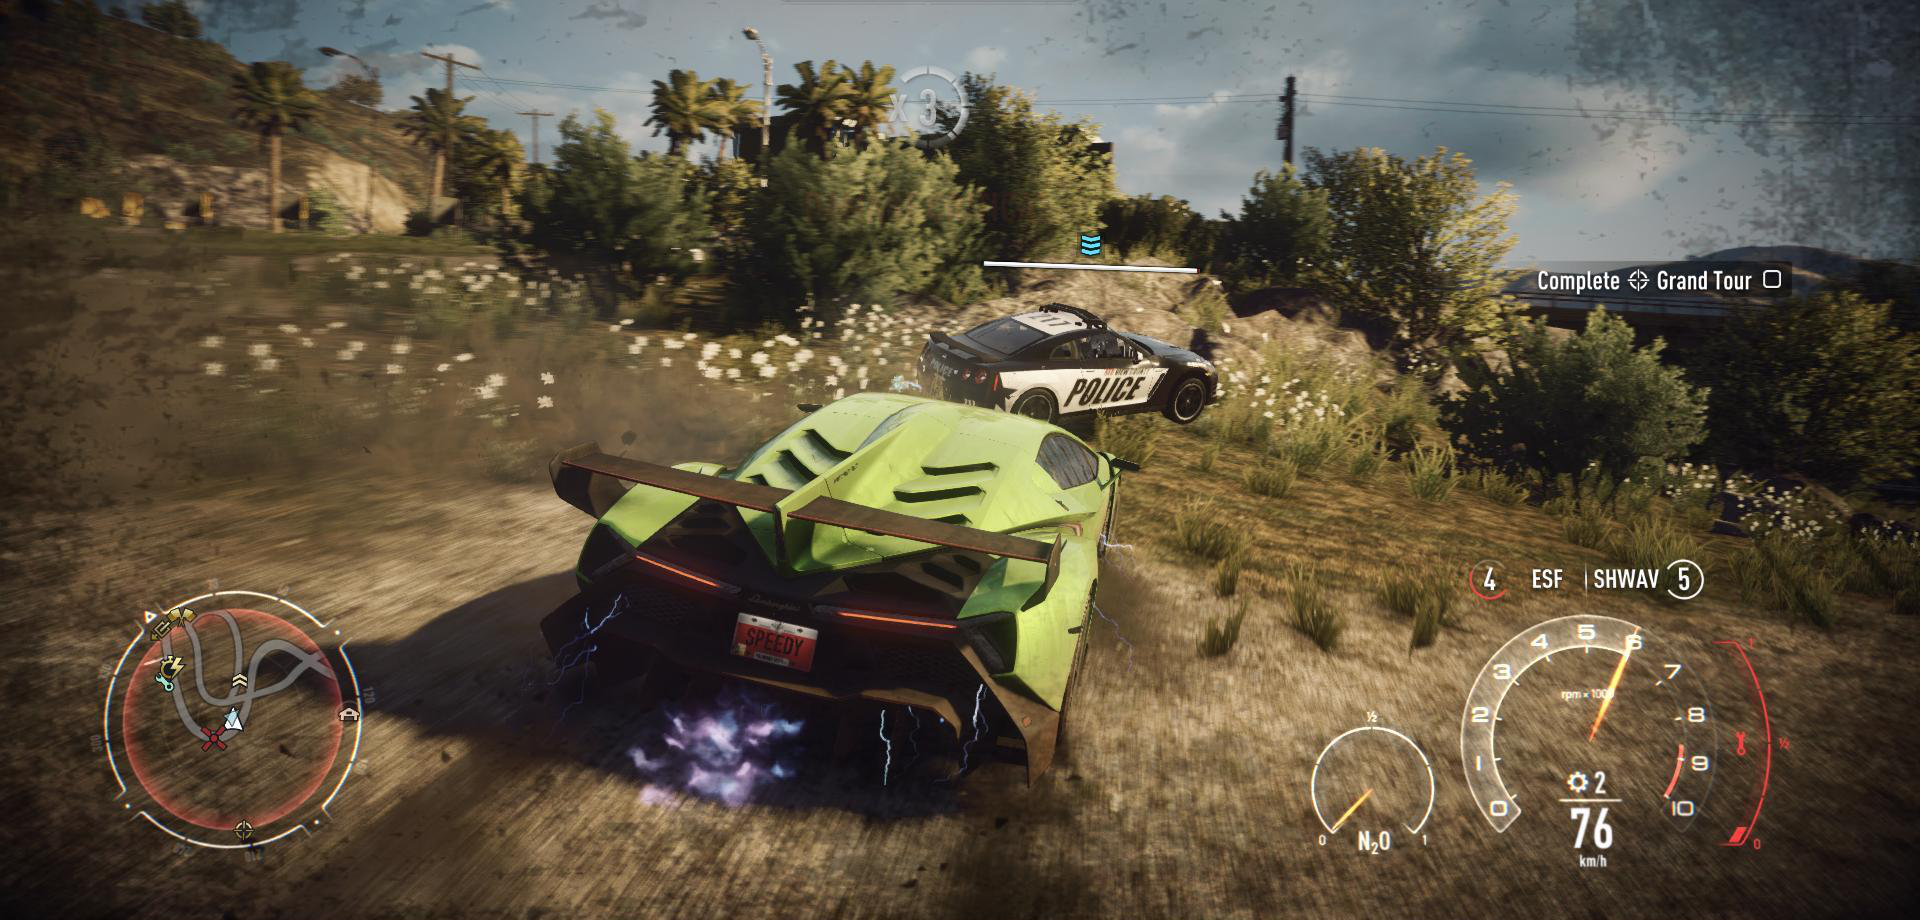

In [ ]:
display(Image.open(FOLDERS['TRAIN']+"/a/716cd29c220b11ec8026842afd0f58b8.jpg",'r'))

## Let's look at the gameplay :p

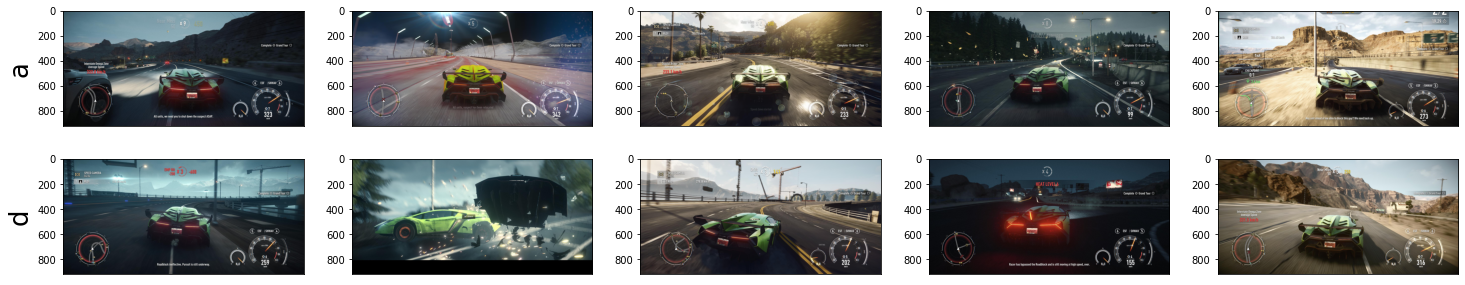

<Figure size 1152x648 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(25,5), constrained_layout=False);
fig = plt.figure(figsize=(16,9));

for ax, row in zip(axs[:,0], class_list):
    ax.set_ylabel(row, rotation=90, fontsize=26)

a, b = 0, 0
for i in os.listdir(FOLDERS["TRAIN"]):
    imgs = os.listdir(os.path.join(FOLDERS["TRAIN"], i))
    random.shuffle(imgs)
    for j in imgs:
        img2 = cv2.imread(os.path.join(FOLDERS["TRAIN"], i, j))
        try:
            img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        except:
            continue
        rm = axs[a][b].imshow(img2)
        rm.axes.get_xaxis().set_visible(False)
        b+=1
        if b>4:
            b=0
            break
    a+=1
    if a>3:
        break